Exploring students performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Count number students of each gender

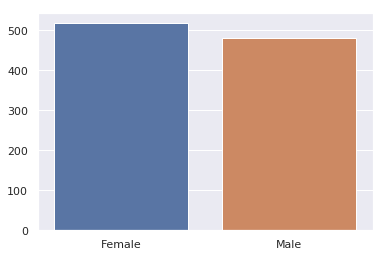

In [6]:
a = len(df[df.gender == 'female'])
b = len(df[df.gender == 'male'])
y = np.array([a, b])
x = ['Female', 'Male']
sns.barplot(x, y)

Use countplot to count string object

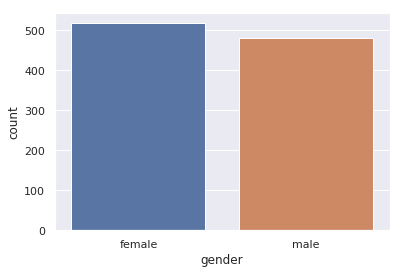

In [7]:
sns.countplot(df.gender)

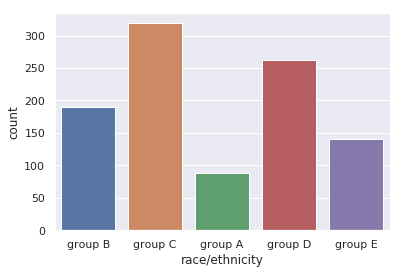

In [8]:
sns.countplot(df['race/ethnicity'])

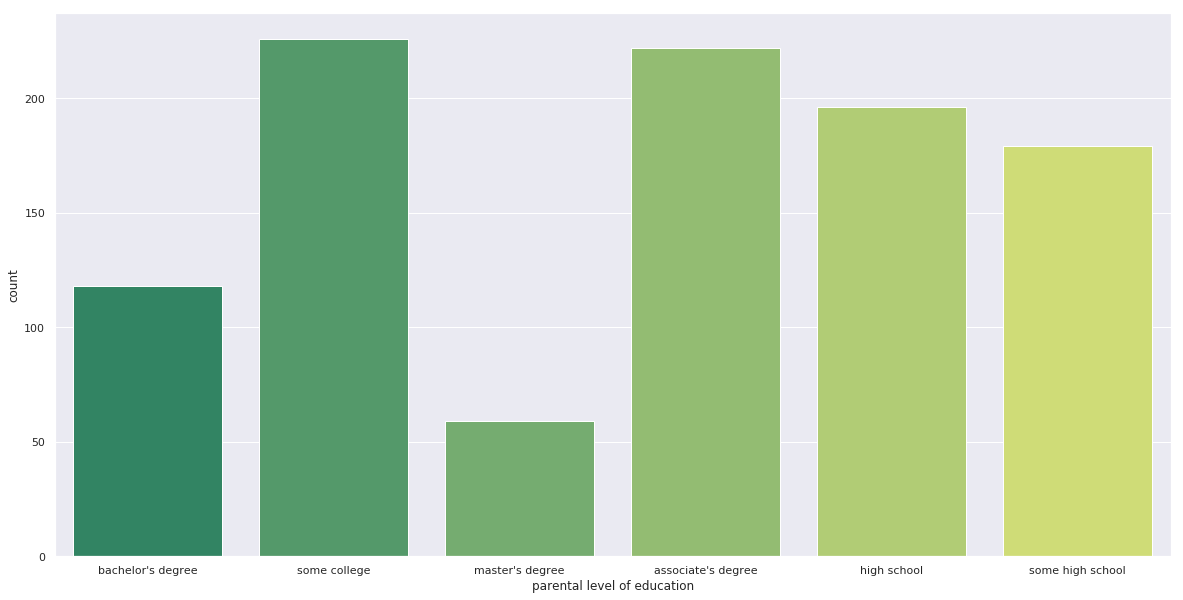

In [9]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(df['parental level of education'], palette = 'summer')

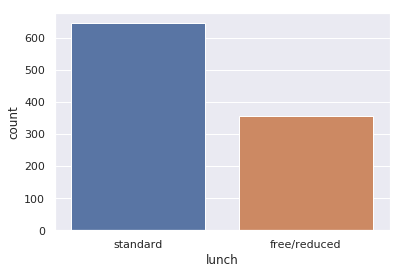

In [10]:
sns.countplot(df['lunch'])

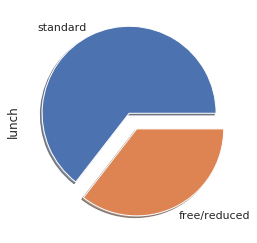

In [11]:
df['lunch'].value_counts().plot.pie(
    explode = [0.1, 0.1], shadow = True)

Students' performance each subject

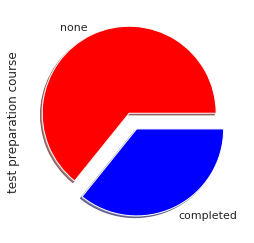

In [78]:
df['test preparation course'].value_counts().plot.pie(explode = [0.1, 0.1], shadow = True, colors = ['red', 'blue'])

Math score mean:  66.089


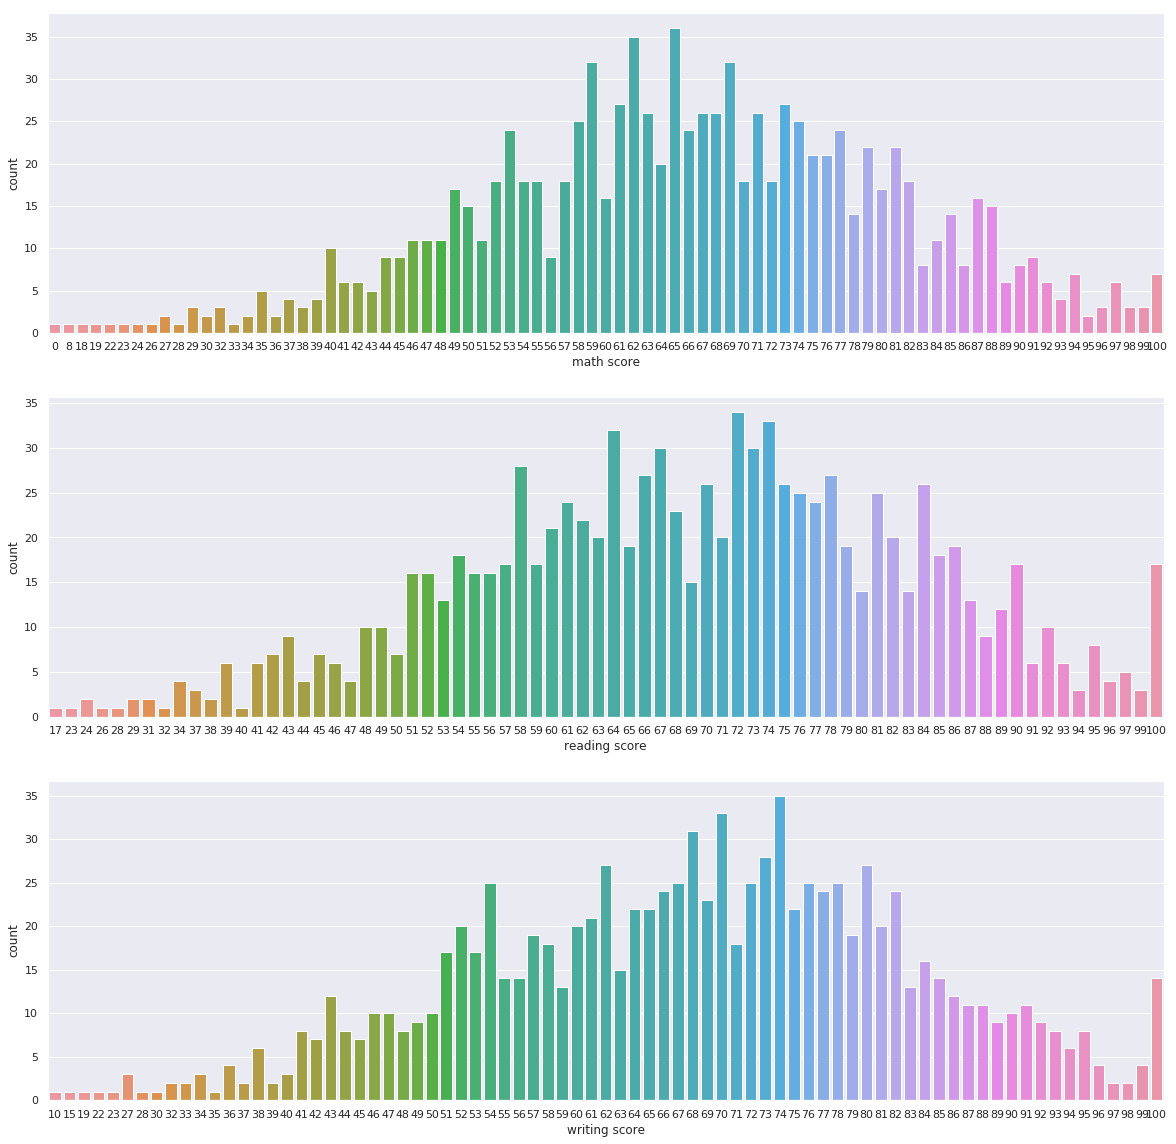

In [76]:
fig, ax = plt.subplots(3, 1, figsize = (20, 20))
sns.countplot(ax = ax[0],x = 'math score', data = df)
sns.countplot(ax = ax[1],
             x = 'reading score', data = df)
sns.countplot(ax = ax[2],
             x = 'writing score', data = df)
print('Math score mean: ', df['math score'].mean())

Calculate average grade (AG)

AG = (math + reading + writing)/3

In [13]:
df['Average Grade'] = round((df['math score'] + df['reading score'] +
            df['writing score']) / 3, 1)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


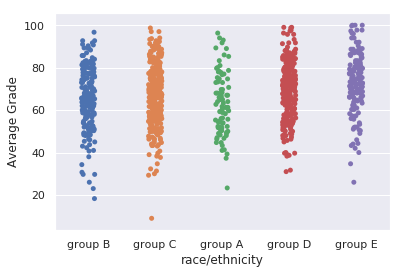

In [79]:
sns.stripplot(y = "Average Grade",
             x = 'race/ethnicity',
             data = df)

Get letter grade for students

In [45]:
def grade_letter(x):
    if x >= 80:
        return 'A'
    if x >= 70:
        return 'B'
    if x >= 60:
        return 'C'
    if x >= 50:
        return 'D'
    else:
        return 'F'
    
df['Final Grade'] = df.apply(lambda x : grade_letter(x['Average Grade']), 
                            axis =1)

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Grade,Final Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,B
1,female,group C,some college,standard,completed,69,90,88,82.3,A
2,female,group B,master's degree,standard,none,90,95,93,92.7,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,F
4,male,group C,some college,standard,none,76,78,75,76.3,B


Let's see whether grades based on gender

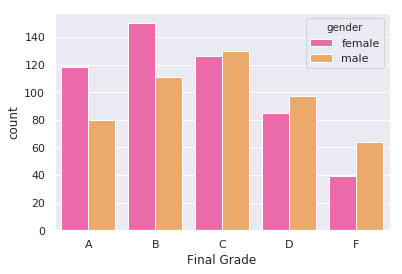

In [43]:
sns.countplot(x = 'Final Grade',
             data = df,
             hue = 'gender',
             order = ['A', 'B', 'C', 'D', 'F'],
             palette = 'spring')

or level of parents' education

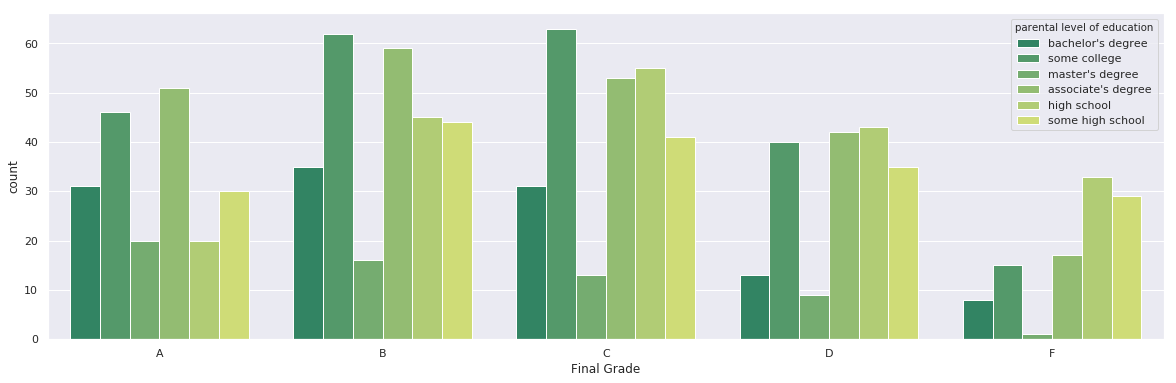

In [50]:
ax, fig = plt.subplots(figsize = (20, 6))
sns.countplot(x = 'Final Grade',
             data = df,
             hue = 'parental level of education',
             order = ['A', 'B', 'C', 'D', 'F'],
             palette = 'summer')